In [1]:
import pandas as pd
import os

# Load the data
resultsDirectory = os.path.join(os.path.dirname(os.getcwd()), "data/results")
resultsJanFebPath = os.path.join(resultsDirectory, "results-Jan-Feb.csv")
resultsJuneJulyPath = os.path.join(resultsDirectory, "results-June-July.csv")
results_df_JanFeb = pd.read_csv(resultsJanFebPath)
results_df_JuneJul = pd.read_csv(resultsJuneJulyPath)
display(results_df_JanFeb.head())
display(results_df_JuneJul.head())

,complaint type,borough,count
0,UNSANITARY CONDITION,BROOKLYN,1395
1,HEAT/HOT WATER,BRONX,15533
2,Sidewalk Condition,STATEN ISLAND,288
3,Illegal Tree Damage,BRONX,12
4,General Construction/Plumbing,Saint Albans,12


,complaint type,borough,count
0,Street Light Condition,BRONX,1388
1,Street Light Condition,NEW YORK,340
2,Street Light Condition,Oakland Gardens,51
3,Street Light Condition,BROOKLYN,1714
4,Traffic Signal Condition,BROOKLYN,1350


In [2]:
# Find the most abundant complaint type in January-February
aggregated_counts_jan_feb = results_df_JanFeb.groupby('complaint type')['count'].sum().reset_index()
most_abundant_complaint_jan_feb = aggregated_counts_jan_feb.loc[aggregated_counts_jan_feb['count'].idxmax()]
display(most_abundant_complaint_jan_feb)


complaint type    HEAT/HOT WATER
count                      41984
Name: 55, dtype: object

In [3]:
# Filter for the same complaint type in June-July DataFrame
same_complaint_june_july = results_df_JuneJul[results_df_JuneJul['complaint type'] == most_abundant_complaint_jan_feb['complaint type']]
aggregated_counts_june_july = same_complaint_june_july.groupby('complaint type')['count'].sum().reset_index()
most_abundant_complaint_june_july = aggregated_counts_june_july.loc[aggregated_counts_june_july['count'].idxmax()]
display(most_abundant_complaint_june_july)



complaint type    HEAT/HOT WATER
count                       4331
Name: 0, dtype: object

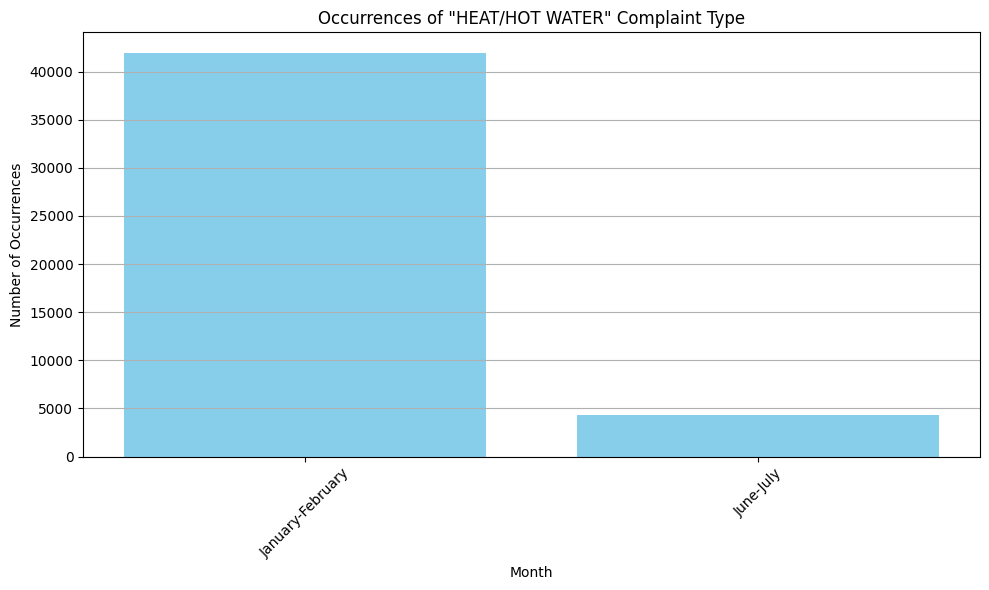

In [4]:
import matplotlib.pyplot as plt

# Prepare data for plotting
months = ['January-February', 'June-July']
counts = [most_abundant_complaint_jan_feb['count'], most_abundant_complaint_june_july['count']]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='skyblue')
plt.title(f'Occurrences of "{most_abundant_complaint_jan_feb["complaint type"]}" Complaint Type')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

# Show the bar chart
plt.show()